In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ejercicio 1
Genera el código para múltiples ($m$ caminantes), cada uno de los caminantes representa el comportamiento en ganancias (encima del eje $x$) y perdidas (debajo del eje $x$) de una empresa que figura en la bolsa de valores, en caso concreto analiza 10 caminantes aleatorios en 1D, para 3000 iteraciones.

## Inciso a
Determina el numero de veces en el que una empresa dejo de ganar y comenzó a perder, y viceversa (cruces en $x=0$) de cada una de las caminatas.

**Pseudocódigo**

Para cada empresa en la lista de caminatas:

    inicializar contador en 0
    Para cada índice desde 1 hasta el final de la caminata:
        si encuentra 0:
            aumentar contador en 1 
    guardar el contador como número de cruces
    imprimir número de cruces para esa empresa

**Solución**

Funciones a usar.

In [2]:
def random_walk(pos: int) -> int:
    """ 
    Dada una posición (int) se mueve a una posición una unidad arriba o una unidad debajo.
    Retorna la posición (int) actualizada.
    """
    # se da un paso aleatorio
    step = np.random.choice([1, -1])
    # la posición cambia respecto al paso
    pos += step
    # devolvemos la posición
    return pos

# Testeando
position = 2
print(f'Posición inicial: {position}')
position = random_walk(position)
print(f'Posición después de caminar: {position}')

Posición inicial: 2
Posición después de caminar: 3


In [3]:
def simulate_utilities(epochs: int, walk=random_walk) -> list:
    """
    Simula las utilidades (pérdidas-ganacias) de una empresa dado un número de épocas (int).
    Se establece el tipo de caminata como la función random_walk, pero se deja el parámetro
    abierto para el inciso c; es decir, para poder cambiar el tipo de caminata aleatoria.
    Retorna la lista de utilidades (list).
    """
    # suponemos que las utilidades de la empresas empiezan en cero
    utilities = [0]
    # hacemos la simulación de las pérdidas y ganancias según las épocas-iteraciones
    for t in range(epochs-1):
        # se calcula la utilidad de la empresa al tiempo t
        utility = walk(utilities[t])
        # se agrega a la lista la utilidad a la lista de utilidades
        utilities.append(utility)
    # retornamos la lista de utilidades de la empresa
    return utilities

# testing
enterprise1 = simulate_utilities(10)
print(enterprise1)

[0, 1, 2, 3, 2, 3, 2, 1, 0, -1]


Con esto ya podemos dar solución al **inciso a**.

In [4]:
# número de "caminantes"
m = 10
# fijamos semilla para siempre que se pueda replicar el ejercicio
np.random.seed(10)
# creamos una lista de empresas
enterprises = []
# lista de frecuencias
frecuencies = []
# hacemos simulaciones de las utilidades de cada empresa
for i in range(m):
    # simluación de utilidades por empresa
    enterprise = simulate_utilities(3000)
    # Solución inciso a: determinamos cuándo dejó de ganas o empezó a perder
    in_zero = enterprise.count(0)
    # agregamos a las frecuencias
    frecuencies.append(in_zero)
    print(f'La empresa {i + 1} dejó de ganar o empezó a perder un total de {in_zero} veces')
    # agregamos empresa a la lista de empresas (para siguientes incisos)
    enterprises.append(enterprise)

La empresa 1 dejó de ganar o empezó a perder un total de 15 veces
La empresa 2 dejó de ganar o empezó a perder un total de 30 veces
La empresa 3 dejó de ganar o empezó a perder un total de 31 veces
La empresa 4 dejó de ganar o empezó a perder un total de 87 veces
La empresa 5 dejó de ganar o empezó a perder un total de 26 veces
La empresa 6 dejó de ganar o empezó a perder un total de 24 veces
La empresa 7 dejó de ganar o empezó a perder un total de 85 veces
La empresa 8 dejó de ganar o empezó a perder un total de 57 veces
La empresa 9 dejó de ganar o empezó a perder un total de 5 veces
La empresa 10 dejó de ganar o empezó a perder un total de 108 veces


### Inciso b
Grafica la frecuencia de cruces en cero por caminata.

**Pseudocódigo**

    Para cada empresa en la lista de caminatas:
        Usar lista de frecuencias de cruces obtenida en el inciso A
        graficar histograma o gráfico de barras con esa lista
        adornar con título, etiquetas, etc.
        mostrar gráfico

**Solución**

Primero veamos una representación gráfica del número de cruces.

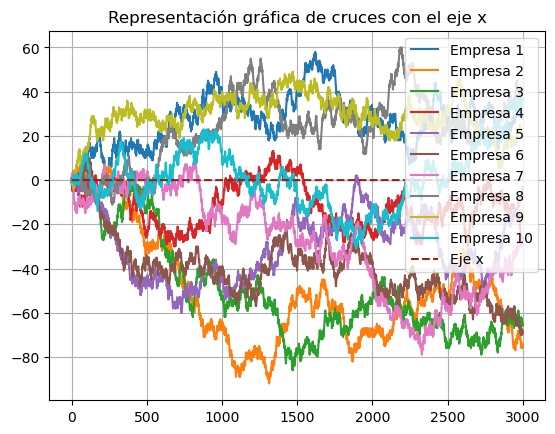

In [5]:
%matplotlib inline
# definimos el eje x (tiempo), tomamos s.p.g. el tamaño de la primera
time = np.arange(start=0, stop=len(enterprises[0]), step=1)

# graficamos cada una de las empresas
for i, enterprise in enumerate(enterprises):
    plt.plot(time, enterprise, label=f'Empresa {i + 1}')


# marcamos el eje x para resaltar
plt.plot(time, [0]*len(time), c='#8e2717', label='Eje x', linestyle='--')
# adornamos gráfico
plt.title('Representación gráfica de cruces con el eje x')
plt.grid()
plt.legend()
plt.show()

Ahora sí grafiquemos las frecuencias con un histograma.

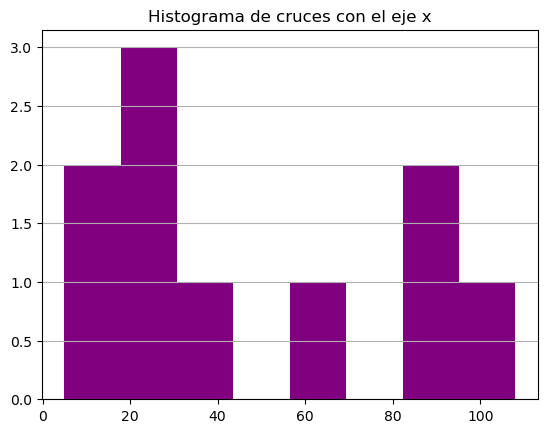

In [6]:
plt.hist(frecuencies, bins=8, color='purple')
plt.title('Histograma de cruces con el eje x')
plt.grid(axis = 'y')
plt.show()

### Inciso c
Realiza el experimento para números aleatorios generados con una distribución uniforme y normal. ¿Existe algún cambio notorio al cambiar la distribución con la que se generan los números aleatorios?

**Pseudocódigo**

    Definir nueva función de caminata aleatoria con parámetro tipo_distribución
        si tipo_distribución es "uniforme":
            usar np.random.uniform con valores centrados en 0
        si tipo_distribución es "normal":
            usar np.random.normal con media 0

    Para cada tipo de distribución ("uniforme" y "normal"):
        inicializar lista de empresas y lista de cruces
        Para cada empresa:
            simular caminata usando la función con esa distribución
            contar los cruces (como en inciso A)
            guardar número de cruces
        graficar caminatas
        analizar visualmente si hay diferencias notorias respecto al caso discreto


In [7]:
def new_random_walk(pos: float, kind: str, select_parameters: bool) -> float:
    """ 
    Dada una posición (float) se mueve a una posición con base en la distribución que se elija (str).
    Se da la opción para definir los parámetros uno mismo.
    Retorna la posición (float) actualizada.
    """
    if kind == 'uniform':
        # parámetros por defecto: uniforme(-raíz 3, raíz 3)
        a, b = -np.sqrt(3), np.sqrt(3)
        # si se desea elegir parámetros, se piden
        if select_parameters:
            # pedimos parámetros
            a = float(input('Introduce el parámetro a: '))
            b = float(input('Introduce el parámetro b: '))
        # se da un paso aleatorio uniforme
        step = np.random.uniform(a, b)
    elif kind == 'normal':
        # parámetros por defecto: normal estándar
        mu, sigma = 0, 1
        # si se desea elegir parámetros, se piden
        if select_parameters:
            # pedimos parámetros
            mu = float(input('Introduce el parámetro mu (media): '))
            sigma = float(input('Introduce el parámetro sigma (desviación estándar): '))
        # se da un paso aleatorio normal
        step = np.random.normal(mu, sigma)
    # la posición cambia respecto al paso
    pos += step
    # devolvemos la posición
    return pos
    
# testing
position = 5.2
print(f'Posición inicial {position}')
move_uniform = new_random_walk(pos=position, kind='uniform', select_parameters=True)
print(f'Si me muevo uniforme voy de {position} a {move_uniform}')
move_normal = new_random_walk(pos=position, kind='normal', select_parameters=True)
print(f'Si me muevo normal voy de {position} a {move_normal}')

Posición inicial 5.2


Introduce el parámetro a:  5
Introduce el parámetro b:  9


Si me muevo uniforme voy de 5.2 a 14.13094435199445


Introduce el parámetro mu (media):  8
Introduce el parámetro sigma (desviación estándar):  2


Si me muevo normal voy de 5.2 a 15.080187588553347


Veamos el caso de la **distribución uniforme**.

In [8]:
# número de "caminantes"
m = 10
# fijamos semilla para siempre que se pueda replicar el ejercicio
np.random.seed(20)
# creamos una lista de empresas
enterprises_uniform = []
# lista de frecuencias
frecuencies = []
# hacemos simulaciones de las utilidades de cada empresa
for i in range(m):
    # elegimos caminata aleatorio uniforme(0,1)
    walk = lambda pos: new_random_walk(pos, kind='uniform', select_parameters=False)
    # simluación de utilidades por empresa
    enterprise = simulate_utilities(epochs=3000, walk=walk)
    # agregamos empresa a la lista de empresas (para siguientes incisos)
    enterprises_uniform.append(enterprise)

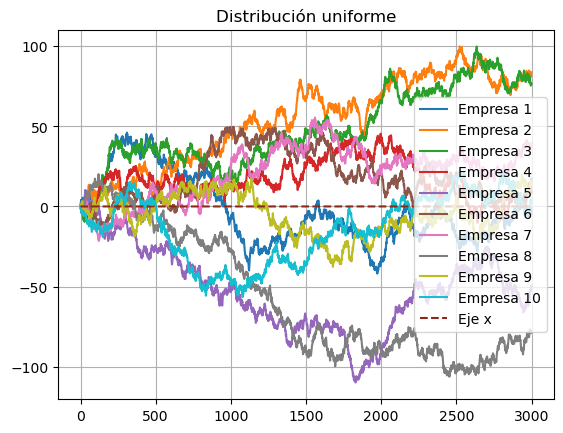

In [9]:
%matplotlib inline
# definimos el eje x (tiempo), tomamos s.p.g. el tamaño de la primera
time = np.arange(start=0, stop=len(enterprises_uniform[0]), step=1)

# graficamos cada una de las empresas
for i, enterprise in enumerate(enterprises_uniform):
    plt.plot(time, enterprise, label=f'Empresa {i + 1}')


# marcamos el eje x para resaltar
plt.plot(time, [0]*len(time), c='#8e2717', label='Eje x', linestyle='--')
# adornamos gráfico
plt.title('Distribución uniforme')
plt.grid()
plt.legend()
plt.show()

Veamos el caso de la **distribución normal**.

In [10]:
# número de "caminantes"
m = 10
# fijamos semilla para siempre que se pueda replicar el ejercicio
np.random.seed(20)
# creamos una lista de empresas
enterprises_normal = []
# lista de frecuencias
frecuencies = []
# hacemos simulaciones de las utilidades de cada empresa
for i in range(m):
    # elegimos caminata aleatorio uniforme(0,1)
    walk = lambda pos: new_random_walk(pos, kind='normal', select_parameters=False)
    # simluación de utilidades por empresa
    enterprise = simulate_utilities(epochs=3000, walk=walk)
    # agregamos empresa a la lista de empresas (para siguientes incisos)
    enterprises_normal.append(enterprise)

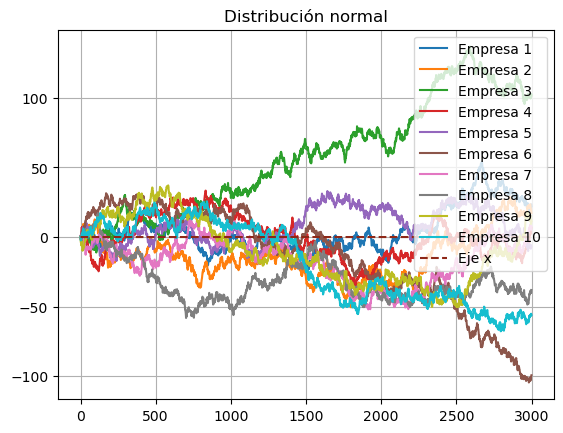

In [11]:
%matplotlib inline
# definimos el eje x (tiempo), tomamos s.p.g. el tamaño de la primera
time = np.arange(start=0, stop=len(enterprises_normal[0]), step=1)

# graficamos cada una de las empresas
for i, enterprise in enumerate(enterprises_normal):
    plt.plot(time, enterprise, label=f'Empresa {i + 1}')


# marcamos el eje x para resaltar
plt.plot(time, [0]*len(time), c='#8e2717', label='Eje x', linestyle='--')
# adornamos gráfico
plt.title('Distribución normal')
plt.grid()
plt.legend()
plt.show()

### Conclusión
Se eligieron por defecto los valores de los parámetros de la siguiente manera:
- Uniforme $unif(-\sqrt{3}, \sqrt{3})$
- Normal $N(0,1)$

Esto para que fuera comparable con lo que habíamos hecho en un inicio, discreta $(-1,1)$, pues en términos de media y varianza se tiene que (con los parámetros definidos anteriormente):

| Distribución | Media | Varianza |
|:-------------|:-----:|:--------:|
|Discreta | 0 | 1|
|Uniforme| 0 | 1|
|Normal| 0 | 1|

Entonces, con esto dicho, podemos ver que las distribuciones en términos de la media son parecidas. Sin embargo, si tratamos de obtener las frecuencias como anteriormente para los casos de las distribuciones uniforme y normal, vamos a ver que no nos dan valores iguales a 0, por lo que el conteo ya no nos serviría.

Por ejemplo, veamos los valores de las utilidades de las empresas en los tres casos.

In [12]:
# s.p.g. tomamos el "caminante 1"
df = pd.DataFrame({
    'discreta': enterprises[0],
    'uniforme': enterprises_uniform[0],
    'normal': enterprises_normal[0]
})

Viendo los primeros elementos ya podemos ver a qué nos referimos.

In [13]:
df.head()

,discreta,uniforme,normal
0,0,0.000000,0.000000
1,-1,0.305294,0.883893
2,-2,1.683015,1.079758
3,-1,3.039317,1.437295
4,-2,4.133410,-0.905967


Veamos las estadísticas.

In [14]:
df.describe()

,discreta,uniforme,normal
count,3000.000000,3000.000000,3000.000000
mean,26.666667,-2.403902,5.154938
std,11.529493,20.809750,15.193711
min,-5.000000,-41.929217,-23.551705
25%,19.000000,-17.937197,-5.468219
50%,27.000000,-7.336760,1.166794
75%,33.000000,12.458167,10.468371
max,58.000000,46.073127,53.904651


Entonces podemos ver claramente que aunque son comparables, la distribución que toma cada uno nos da estadísticas muy diferentes.

Dejaremos un gráfico de caja-bigote para representar gráficamente la información.

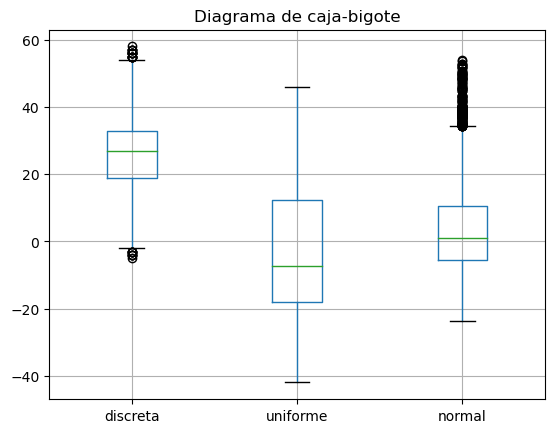

In [15]:
df.boxplot()
plt.title('Diagrama de caja-bigote')
plt.grid(True)
plt.show()